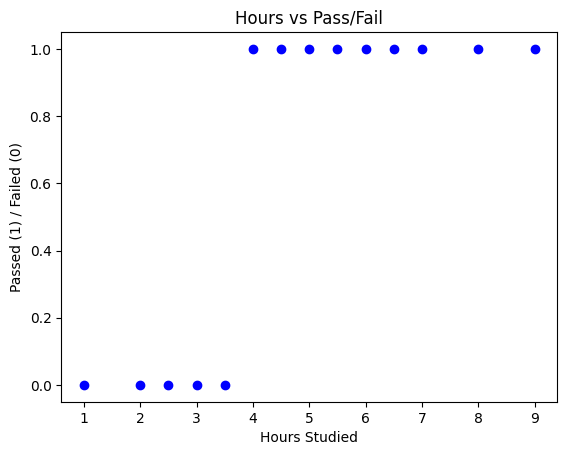

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hours = np.array([1, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9], dtype=float)
passed = np.array([0, 0,   0,   0,   0,   1,   1,   1,   1,   1,   1,  1,  1,  1], dtype=int)

plt.scatter(hours, passed, color='blue')
plt.title("Hours vs Pass/Fail")
plt.xlabel("Hours Studied")
plt.ylabel("Passed (1) / Failed (0)")
plt.show()


In [4]:
x = hours.astype(float)          
y = passed.astype(float)         

In [5]:
# 1) Sigmoid
def sigmoid(z):
    # numerically stable sigmoid
    out = np.empty_like(z, dtype=float)
    pos = z >= 0
    neg = ~pos
    out[pos] = 1.0 / (1.0 + np.exp(-z[pos]))
    ez = np.exp(z[neg])
    out[neg] = ez / (1.0 + ez)
    return out

In [6]:
# 2) Initialize weights
w0 = 0.0   # intercept
w1 = 0.0   # slope

# 3) Hyperparameters
lr = 0.1         # learning rate
epochs = 1500    # training iterations

losses = []

In [7]:
# 4) Training loop (gradient descent)
for epoch in range(epochs):
    # Linear score (z) and prediction
    z = w0 + w1 * x              # shape (n,)
    y_hat = sigmoid(z)           # probabilities in (0,1)
    
    # Binary cross-entropy loss
    eps = 1e-12                  # avoid log(0)
    loss = -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    losses.append(loss)
    
    # Gradients (derivatives of loss wrt w0, w1)
    # dL/dw0 = mean(y_hat - y)
    # dL/dw1 = mean( (y_hat - y) * x )
    err = (y_hat - y)
    dw0 = np.mean(err)
    dw1 = np.mean(err * x)
    
    # Parameter update
    w0 -= lr * dw0
    w1 -= lr * dw1

print(f"Trained from-scratch parameters:\n  w0 (intercept) = {w0:.4f}\n  w1 (slope)     = {w1:.4f}")

Trained from-scratch parameters:
  w0 (intercept) = -6.1920
  w1 (slope)     = 1.7195


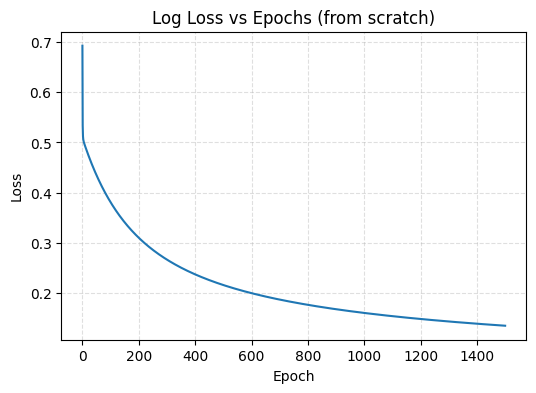

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.title("Log Loss vs Epochs (from scratch)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [10]:
# Use the learned parameters w0, w1 from training
# Create a smooth grid of hour values
x_grid = np.linspace(min(hours)-0.5, max(hours)+0.5, 200)
z_grid = w0 + w1 * x_grid
p_grid = sigmoid(z_grid)

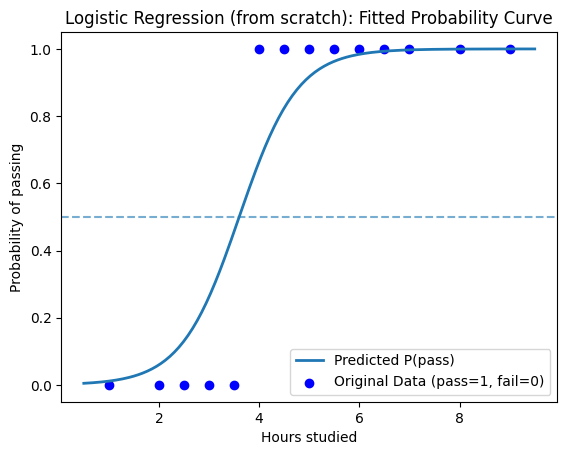

In [15]:
# Plot the probability curve
plt.plot(x_grid, p_grid, label="Predicted P(pass)", linewidth=2)
plt.scatter(hours, passed, color='blue', label="Original Data (pass=1, fail=0)")
plt.axhline(0.5, linestyle="--", alpha=0.6)

plt.xlabel("Hours studied")
plt.ylabel("Probability of passing")
plt.title("Logistic Regression (from scratch): Fitted Probability Curve")
plt.legend()
plt.show()

In [18]:
h = 6.0
print(f"Hours = {h}, predicted probability of pass = {predict_proba_single(h):.3f}")

Hours = 6.0, predicted probability of pass = 0.984
